(2650, 6, 3000)


<Axes: >

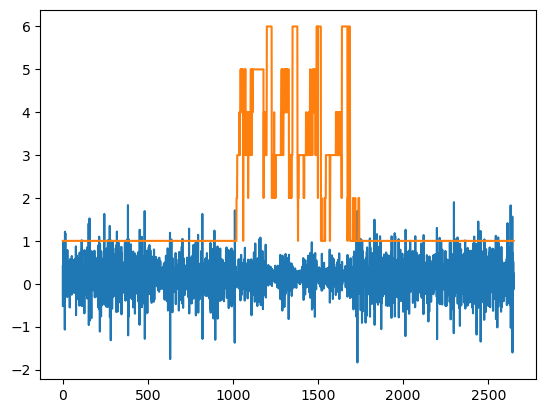

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.fft import fft,fftfreq

data = np.load('p00_n1_X.npy')
print(data.shape)
data = data.reshape((data.shape[1],data.shape[0],data.shape[2]))
labels = np.load('p00_n1_Y.npy')

sns.lineplot(np.mean(data[0,:,:],1)*1000000)
sns.lineplot(labels)

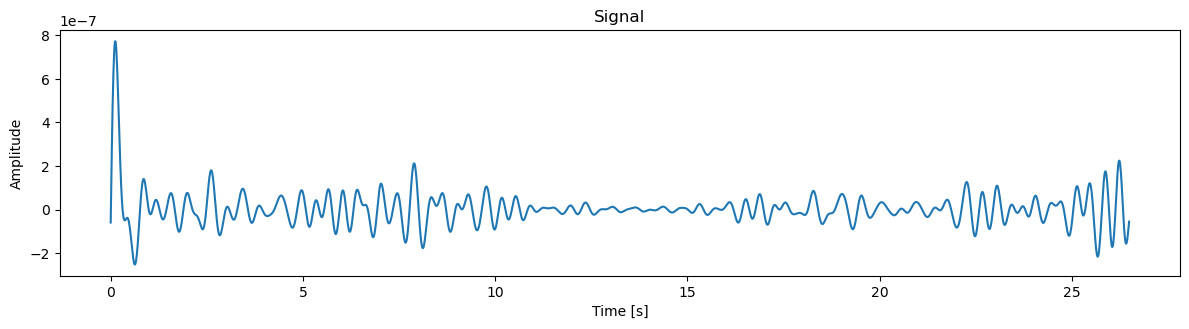

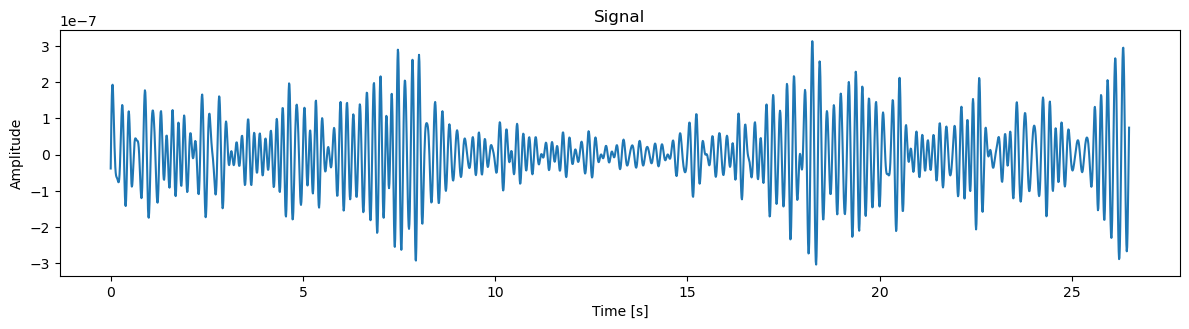

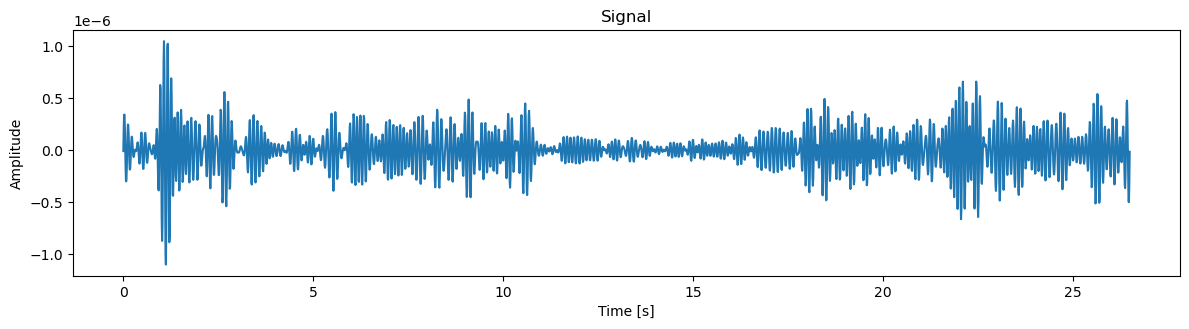

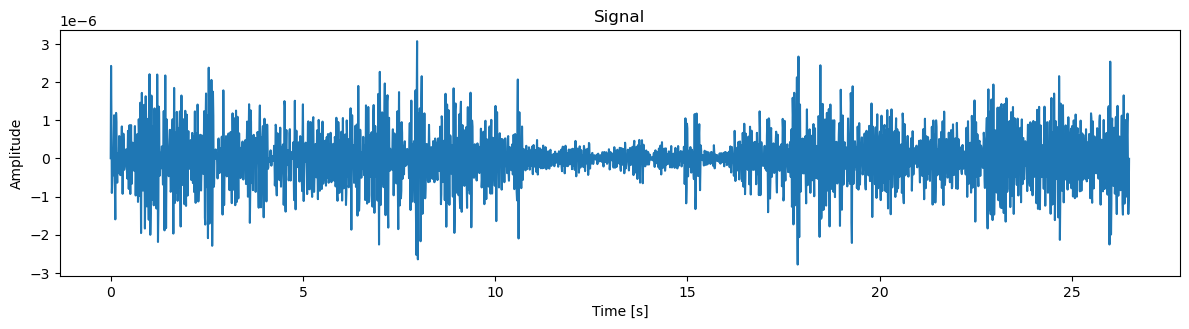

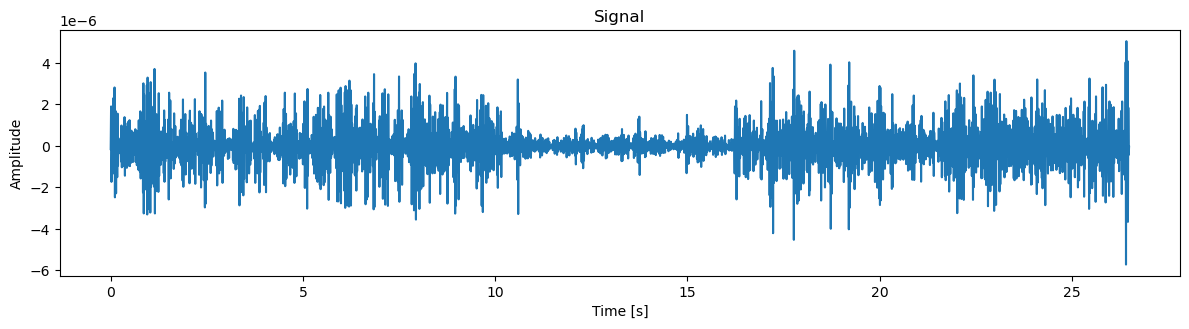

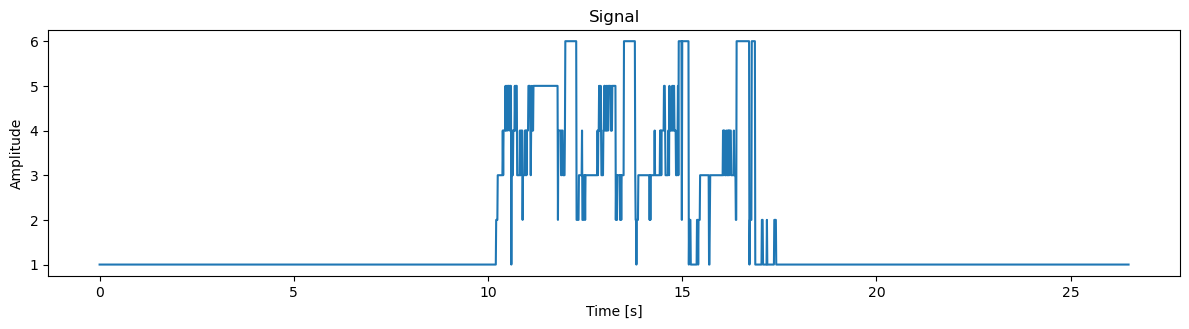

In [162]:
from scipy.signal import butter, filtfilt

fs = 100  # sampling frequency in Hz
N = 2650  # number of samples in the signal
signal = np.mean(data[2,:,:], 1)

#Duration of the signal in seconds
D = N / fs

#Create the time vector
t = np.linspace(0, D, N, endpoint=False)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

delta = butter_bandpass_filter(signal, 1, 3, fs, order=4)
theta = butter_bandpass_filter(signal, 4, 7, fs, order=4)
alpha = butter_bandpass_filter(signal, 8, 12, fs, order=4)
beta = butter_bandpass_filter(signal, 13, 30, fs, order=4)
gamma = butter_bandpass_filter(signal, 30, 49, fs, order=4)

def plot_signal(signal):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, signal)
    plt.title('Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
plot_signal(delta)
plot_signal(theta)
plot_signal(alpha)
plot_signal(beta)
plot_signal(gamma)
plot_signal(labels)

# Real Fourier Transform Explanation

(0.0, 40.0)

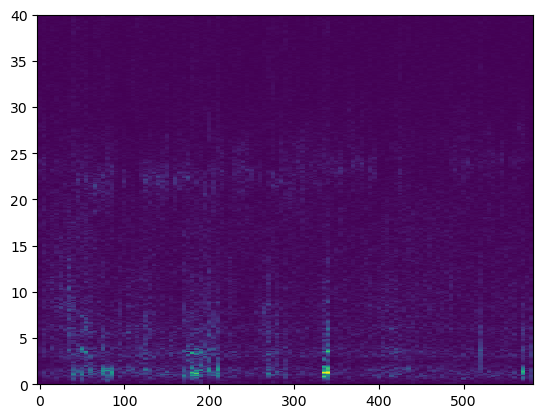

In [3]:
s1 = data[0,labels==2,:]

flat = s1.flatten()
freq, time, output = stft(flat,300,nperseg=3000)

plt.pcolormesh(time,freq,np.abs(output))
plt.ylim(0,40)

(0.0, 40.0)

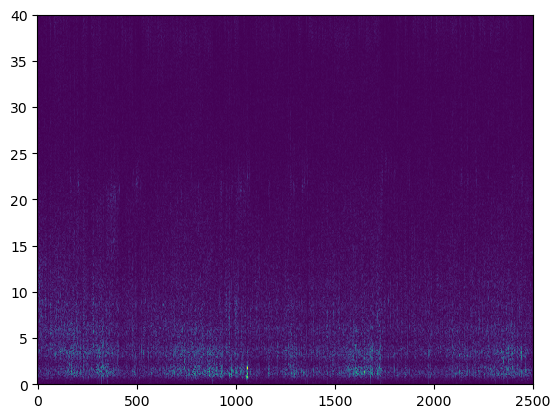

In [4]:
s2 = data[0,labels==3,:]

flat = s2.flatten()
freq, time, output = stft(flat,300,nperseg=3000)

plt.pcolormesh(time,freq,np.abs(output))
plt.ylim(0,40)

(0.0, 40.0)

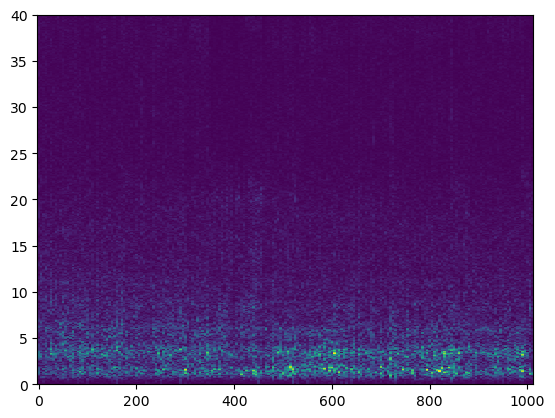

In [5]:
s3 = data[0,labels==4,:]

flat = s3.flatten()
freq, time, output = stft(flat,300,nperseg=3000)

plt.pcolormesh(time,freq,np.abs(output))
plt.ylim(0,40)

(0.0, 40.0)

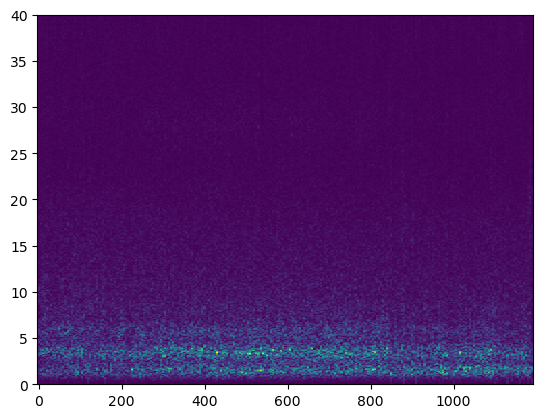

In [6]:
s4 = data[0,labels==5,:]

flat = s4.flatten()
freq, time, output = stft(flat,300,nperseg=3000)

plt.pcolormesh(time,freq,np.abs(output))
plt.ylim(0,40)

In [1]:
l = ["None","Waking","Stage 1","Stage 2","Stage 3","Stage 4","REM"]
def plot_fft(data,dimension,label,smoothing=10):
    subset = data[dimension,labels==label,:]
    flat = subset.flatten()
    yf = fft(flat)
    xf = fftfreq(len(flat),100/len(flat))[:len(flat)//2]
    yval = 2.0/len(flat)*np.abs(yf[:len(flat)//2])
    s = pd.Series(yval)
    y = s.rolling(smoothing)
    avg = y.mean()
    sns.lineplot(x=xf,y=avg,linewidth=0.5,label=l[label])

In [131]:
def plot_fft_segment(data,dimension,label,segment=0,smoothing=10):
    subset = data[dimension,labels==label,:]
    subset = subset[segment:segment+4,:]
    flat = subset.flatten()
    print(len(flat))
    yf = fft(flat)
    xf = fftfreq(len(flat),100/len(flat))[:len(flat)//2]
    yval = 2.0/len(flat)*np.abs(yf[:len(flat)//2])
    s = pd.Series(yval)
    y = s.rolling(smoothing)
    avg = y.mean()
    sns.lineplot(x=xf,y=avg,linewidth=0.5,label=l[label])

In [ ]:
def get_fft(input_waveform,sample_rate = 100,smoothing=5):
    # SUMMARY: Computes 1-D Fast Fourier Transform on a sequence of data.
    # RETURNS: tuple (x-values are Frequency in Hz, y-values are Amplitude)
    # LIMITATIONS: Max frequency value is 1/2 of time interval. Utilize last 4 time intervals for more accurate fourier transform on higher frequencies.
    flat = input_waveform.flatten()
    print(len(flat))
    yf = fft(flat)
    xf = fftfreq(len(flat),100/len(flat))[:len(flat)//2]
    yval = 2.0/len(flat)*np.abs(yf[:len(flat)//2])
    s = pd.Series(yval)
    y = s.rolling(smoothing)
    avg = y.mean()
    sns.lineplot(x=xf,y=avg,linewidth=0.5) # plot waveform
    return (xf,avg)

In [282]:
def get_fft_binned(input_waveform,min=0,max=5,sample_rate = 100,smoothing=1, bins=20):
    # SUMMARY: Computes 1-D Fast Fourier Transform on a sequence of data, returns sum between min and max frequency in Hz normalized to waveform amplitude
    # RETURNS: float (normalized total area under curve of fourier transform between min and max frequency specified)
    # LIMITATIONS: Max frequency value is 1/2 of time interval. Utilize last 4 time intervals for more accurate fourier transform on higher frequencies.
    flat = input_waveform.flatten()
    yf = fft(flat)
    xf = fftfreq(len(flat),100/len(flat))[:len(flat)//2]
    yval = 2.0/len(flat)*np.abs(yf[:len(flat)//2])
    s = pd.Series(yval)
    y = s.rolling(smoothing)
    avg = y.mean()

    bin_values, bin_edges = np.histogram(avg[(xf>min) & (xf<max)], bins=bins)
    return bin_values / bin_values.sum()
    #sns.lineplot(x=xf,y=avg,linewidth=0.5) # plot waveform
    #return avg[(xf>min) & (xf < max)].sum()/avg.sum()

In [295]:
def linregress(data,time):
    time_points = np.linspace(0, time, len(data))
    slope, intercept = np.polyfit(time_points, data, 1)
    return slope

def get_input_vector(data,epoch,backward=4):
    #SUMMARY: Code generates an input vector given a dataset and epoch #
    upperbounds = [30,30,30,10,1,1]
    output = np.zeros(102)
    for i in range(0,5):
        # fetch data subset
        subset = data[i,:,:]
        # fetch epoch subset
        subset = subset[(epoch-backward):epoch,:].flatten()
        output[20*i:20*(i+1)] = get_fft_binned(subset,max=upperbounds[i])
    output[100] = np.mean(data[5,(epoch-backward):epoch,:].flatten())/40
    output[101] = linregress(data[5,(epoch-backward):epoch,:].flatten(),(backward + 1)/2)*50
    return output

def get_output_vector(labels,epoch):
    # SUMMARY: Gets the output vector given an epoch #
    output = np.zeros(6)
    output[int(labels[epoch]-1)]=1
    return output

In [294]:
labels[1048]-1

4.0

In [296]:
get_input_vector(data2,6)
get_output_vector(labels,1048)

array([0., 0., 0., 0., 1., 0.])

In [265]:
data2 = data[:,labels==5,:]

In [268]:
data2.shape

(6, 119, 3000)

12000
12000
12000
12000
12000


<Axes: >

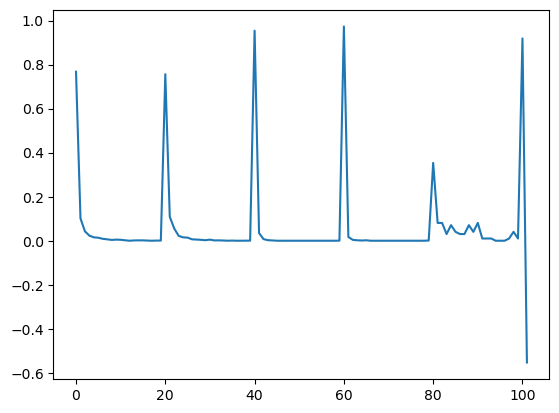

In [277]:
sns.lineplot(get_input_vector(data2,6))

In [253]:
data[5,:,:].max()

37.62961203384707

# Bins

Channel 0: 0 to 30 Hz, split into 1.5hz increments
Channel 1: 0 to 30 Hz, split into 1.5hz increments
Channel 2: 0 to 10 Hz, split into 0.5hz increments
Channel 3: 0 to 1 Hz, split into 0.05hz increments
Channel 4: 0 to 1 Hz, split into 0.05hz increments

3000


(0.0, 2.0)

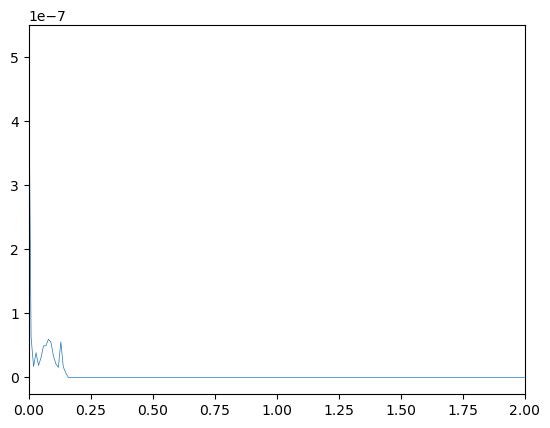

In [250]:
get_fft_binned(data[4,labels==6,:][0:1,:],10,20) 
plt.xlim(0,2)

In [ ]:
from scipy import fftpack

fftpack.fft()

<Axes: >

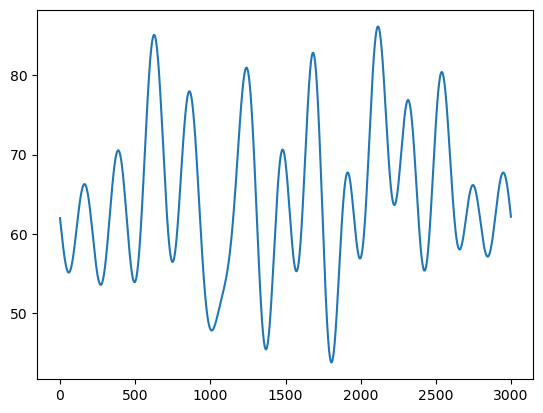

In [160]:
sns.lineplot(data[3,labels==6,:][0,:])

12000


(0.0, 1.0)

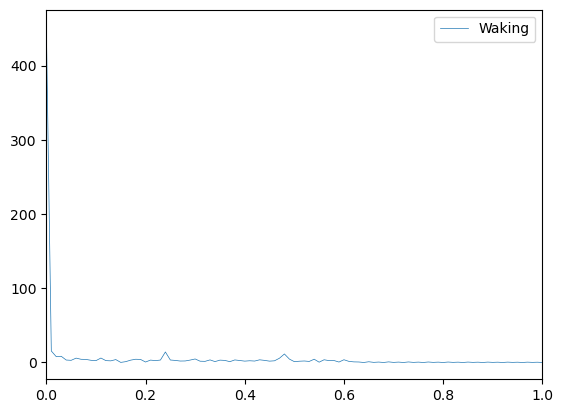

In [177]:
plot_fft_segment(data,3,1,14,smoothing=1)
plt.xlim(0,1)

In [60]:
def plot_stft(data,dimension):
    fig, ax = plt.subplots(2,3)
    fig.set_size_inches(8,6)
    ax = ax.flatten()
    print(ax.shape)
    for i in range(1,7):
        subset = data[dimension,labels==i,:]
        flat = subset.flatten()
        freq, time, output = stft(flat,100)
        #sns.heatmap(np.abs(output),cmap='magma',xticklabels=time,yticklabels=freq)
        ax[i-1].pcolormesh(time,freq,np.abs(output),cmap='magma')
        ax[i-1].set_ylim(0,50)
        ax[i-1].set_title(l[i])


In [9]:
def calc_fft(data,smoothing=10):
    yf = fft(data)
    xf = fftfreq(len(data),100/len(data))[:len(data)//2]
    yval = 2.0/len(data)*np.abs(yf[:len(data)//2])
    s = pd.Series(yval)
    y = s.rolling(smoothing)
    avg = y.mean()

    bins = np.arange(0,20.05,0.05)
    indices = np.digitize(xf,bins)
    bin_sums = [avg[indices==i].mean() for i in range(1,len(bins))]

    return bin_sums
    # bin into 0-100 @ 0.5hz intervals.
    


In [10]:
def plot_fftfreq(data,dimension):
    fig, ax = plt.subplots(2,3)
    fig.set_size_inches(8,6)
    ax = ax.flatten()
    print(ax.shape)
    for i in range(1,7):
        subset = data[dimension,labels==i,:]
        output = np.zeros((subset.shape[0],400))
        for j in range(0,subset.shape[0]):
            q = subset[j,:]
            hist = calc_fft(q)
            output[j,:] = hist
        print(output.shape)
        sns.heatmap(output.transpose(),ax=ax[i-1])
        ax[i-1].set_ylim(0,30)


(6,)
(1997, 400)
(58, 400)
(250, 400)
(101, 400)
(119, 400)
(125, 400)


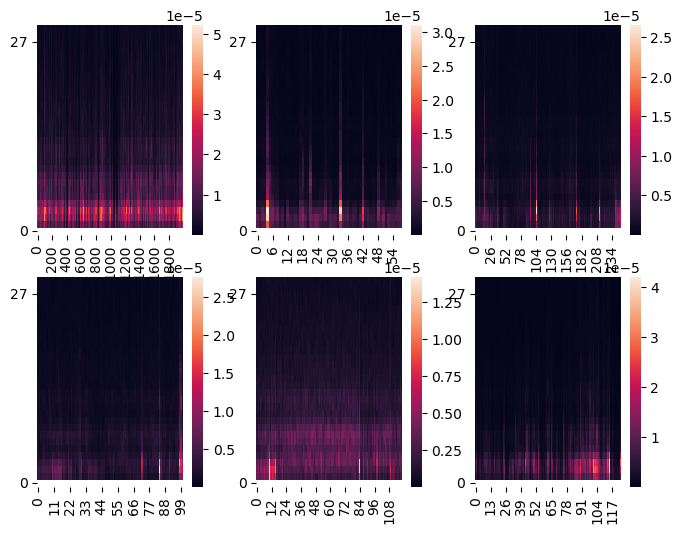

In [189]:
output = plot_fftfreq(data,2)

In [ ]:
plot_stft_derivative(data,3)

(6,)


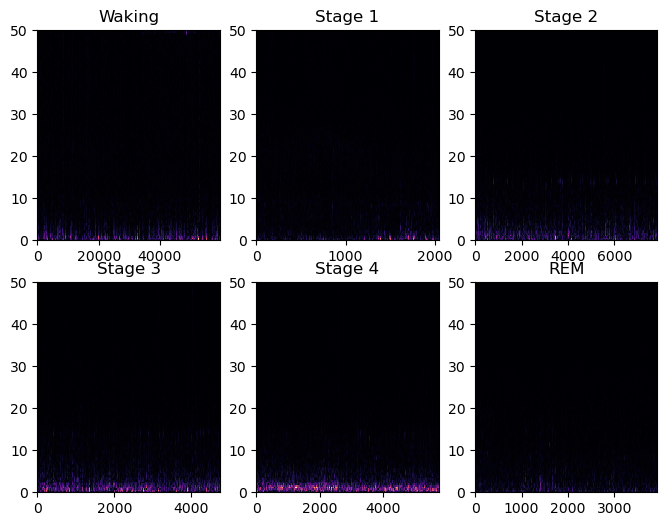

In [61]:
plot_stft(data,0)

In [ ]:
output

[]

IndexError: list index out of range

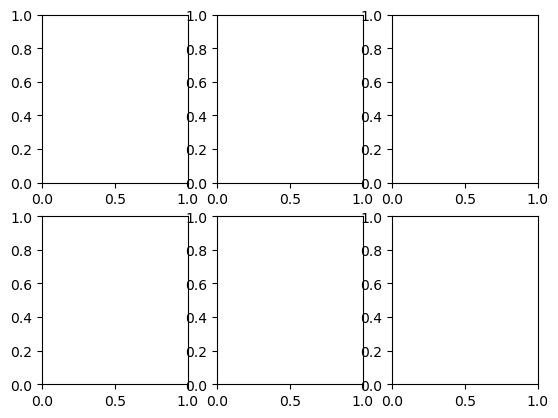

In [169]:
fig, ax = plt.subplots(2,3)
ax = ax.flatten()
for i in range(0,6):
    sns.heatmap(output[i].transpose(),ax[i])
    

(0.0, 100.0)

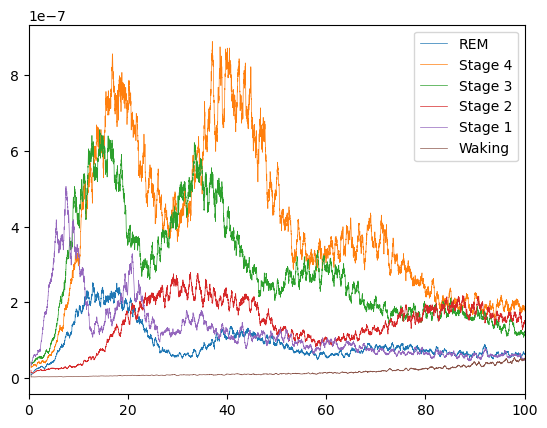

In [104]:
plot_fft(data,0,6,50)
plot_fft(data,0,5,50)
plot_fft(data,0,4,50)
plot_fft(data,0,3,50)
plot_fft(data,0,2,50)
plot_fft(data,0,1,50)
plt.xlim(0,100)

(0.0, 100.0)

c:\Users\sanja\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\sanja\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


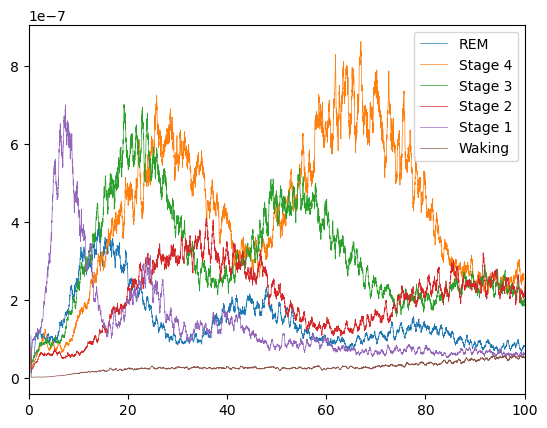

In [18]:
plot_fft(data,0,6,50)
plot_fft(data,0,5,50)
plot_fft(data,0,4,50)
plot_fft(data,0,3,50)
plot_fft(data,0,2,50)
plot_fft(data,0,1,50)
plt.xlim(0,100)

(0.0, 100.0)

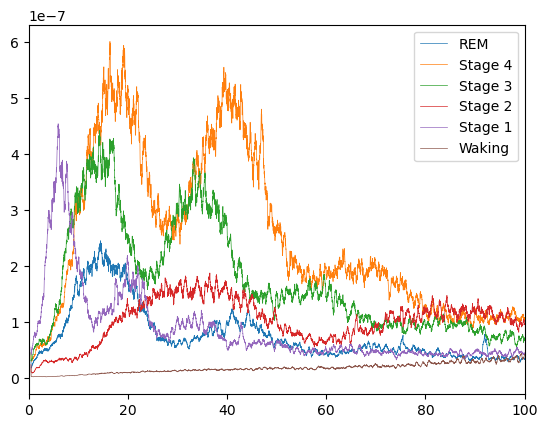

In [105]:
plot_fft(data,1,6,50)
plot_fft(data,1,5,50)
plot_fft(data,1,4,50)
plot_fft(data,1,3,50)
plot_fft(data,1,2,50)
plot_fft(data,1,1,50)
plt.xlim(0,100)

(0.0, 100.0)

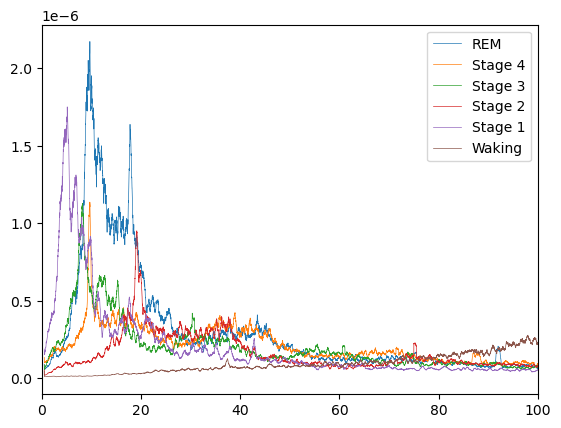

In [106]:
plot_fft(data,2,6,50)
plot_fft(data,2,5,50)
plot_fft(data,2,4,50)
plot_fft(data,2,3,50)
plot_fft(data,2,2,50)
plot_fft(data,2,1,50)
plt.xlim(0,100)

(0.0, 100.0)

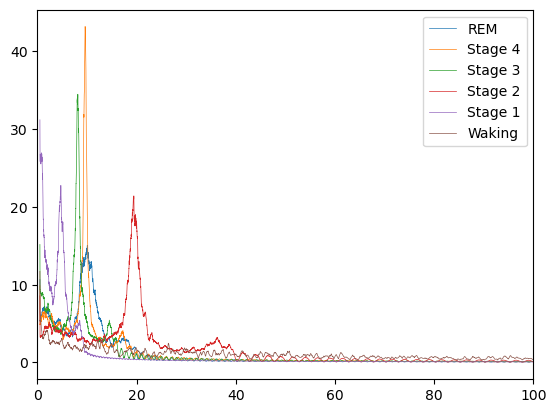

In [107]:
plot_fft(data,3,6,50)
plot_fft(data,3,5,50)
plot_fft(data,3,4,50)
plot_fft(data,3,3,50)
plot_fft(data,3,2,50)
plot_fft(data,3,1,50)
plt.xlim(0,100)

(0.0, 100.0)

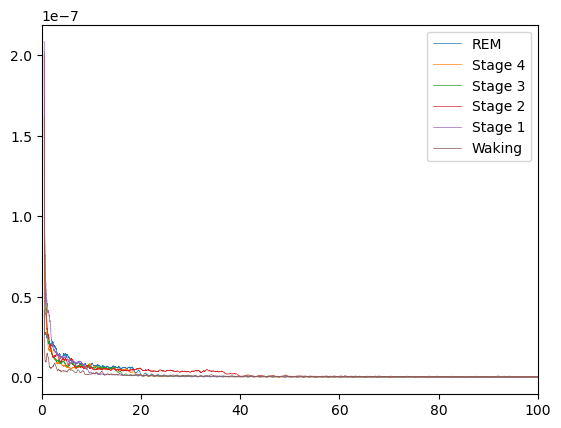

In [108]:
plot_fft(data,4,6,50)
plot_fft(data,4,5,50)
plot_fft(data,4,4,50)
plot_fft(data,4,3,50)
plot_fft(data,4,2,50)
plot_fft(data,4,1,50)
plt.xlim(0,100)

(0.0, 50.0)

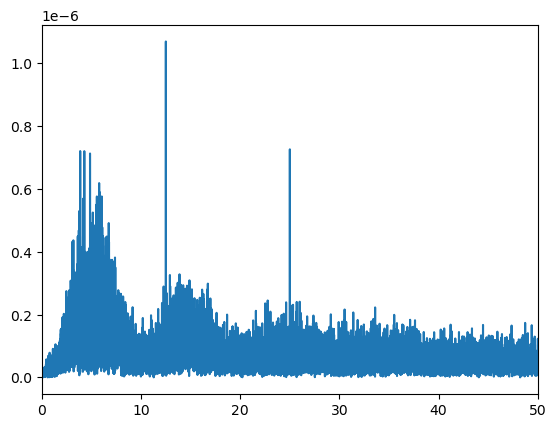

In [60]:


s5 = data[0,labels==6,:]

flat = s5.flatten()
freq, time, output = stft(flat,300,nperseg=3000)

yf = fft(flat)
xf = fftfreq(len(flat),300/len(flat))[:len(flat)//2]

plt.plot(xf,2.0/len(flat)*np.abs(yf[:len(flat)//2]))

plt.xlim(0,50)

#plt.pcolormesh(time,freq,np.abs(output))
#plt.ylim(